In [1]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from skimage import io

In [2]:
#note, this function expects a matrix A[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
def display(A):
    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    %matplotlib osx 
    
    plt.imshow(A); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

def displayLocal(A):
    plt.axis("off") # turn off axis labels
    plt.imshow(A)
    plt.show()

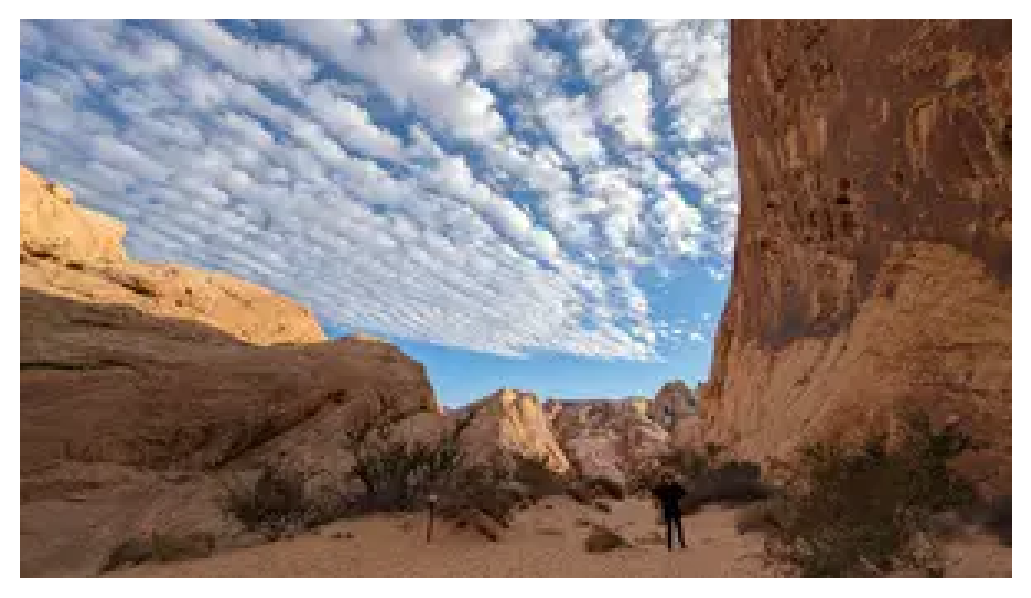

In [3]:
image = io.imread("lowres.jpg")

plt.axis("off") # turn off axis labels
plt.imshow(image)
plt.show()


In [4]:
width = image.shape[1]
height = image.shape[0]
print(width)
print(height)

300
169


Part where we start DLA

In [5]:
nParticles = 30000
maxX = width
maxY = height

In [6]:
canvas = np.zeros([height,width,3], dtype=np.uint8)
canvas.fill(255)

model = np.zeros([height, width])

print(canvas.shape)

(169, 300, 3)


In [7]:
canvas[0] = image[0]
model[0] = np.ones([1, width])

yBuffer = 5
yStart  = 1 + yBuffer

In [8]:
# for x in range(width):
#     for y in range(height):
#         if np.sqrt((x - width // 2) ** 2 + (y - height // 2) ** 2) < 25:
#             canvas[y, x] = image[y, x]

# for x in range(width):
#     for y in range(height):
#         if np.sqrt((x - width // 4) ** 2 + (y - height // 2) ** 2) < 25:
#             canvas[y, x] = image[y, x]

# for x in range(width):
#     for y in range(height):
#         if np.sqrt((x - width // 4 * 3) ** 2 + (y - height // 2) ** 2) < 25:
#             canvas[y, x] = image[y, x]

In [9]:
def checkSum(A):
    maxSum = A.shape[0] * A.shape[1]
    sum = np.sum(A)
    if sum / maxSum > 0.90:
        return True
    return False

def init_figure():
    fig = plt.figure()
    return fig

In [10]:
# from matplotlib.animation import FFMpegWriter
# metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
# writer = FFMpegWriter(fps=15, metadata=metadata)

# # Set up figure
# fig = init_figure()

# with writer.saving(fig, "filling_valley_dendrite_redo.mp4", dpi=200):

i = 0
while True:

    x  = np.random.randint(0,maxX)
    y  = yStart; 

    while True:
        
        xOrg = x
        yOrg = y

        r = np.random.random(); 
        
        #left, right, up, or down and change x and y accordingly
        if r < 0.10:
            x -= 1
        elif r < 0.4:
            x += 1
        elif r < 0.75:
            y -= 1
        else:
            y += 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        elif x >= maxX:
            x = 0
        
        if (model[y,x] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x - 1
        xm = x + 1
        yp = y - 1
        ym = y + 1
        
        if xm >= maxX:
            xm = 0
        if xp < 0:
            xp = maxX - 1

        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        
        r = np.random.random()
        p = 0.2
        if (r < p and (model[y, xp] == 1 or model[y, xm] == 1 or model[ym, x] == 1 or model[yp, x] == 1)): 
            model[y,x] = 1
            canvas[y,x] = image[y][x]
            if (y+yBuffer>yStart and y+yBuffer<maxY): 
                yStart = y+yBuffer

            nNewParticlesPerFrame = 500 
            if (i%nNewParticlesPerFrame==0): 
                done = checkSum(model)
                display(canvas)
                # plt.draw()
                # plt.pause(0.0001)
                # writer.grab_frame()
                
            break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        # if not done:
        #     yStart = 10
        # else:
        break
    
    if done:
        break;

    i += 1
display(canvas)

model = np.zeros([height, width])
model[0] = np.ones([1, width])

yBuffer = 5
yStart  = 1 + yBuffer

while True:

    x  = np.random.randint(0,maxX)
    y  = yStart; 

    while True:
        
        xOrg = x
        yOrg = y

        r = np.random.random(); 
        
        #left, right, up, or down and change x and y accordingly
        if r < 0.10:
            x -= 1
        elif r < 0.2:
            x += 1
        elif r < 0.75:
            y -= 1
        else:
            y += 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        elif x >= maxX:
            x = 0
        
        if (model[y,x] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = x - 1
        xm = x + 1
        yp = y - 1
        ym = y + 1
        
        if xm >= maxX:
            xm = 0
        if xp < 0:
            xp = maxX - 1

        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        
        r = np.random.random()
        p = 0.2
        if (r < p and (model[y, xp] == 1 or model[y, xm] == 1 or model[ym, x] == 1 or model[yp, x] == 1)): 
            model[y,x] = 1
            canvas[y,x] = image[y][x]
            if (y+yBuffer>yStart and y+yBuffer<maxY): 
                yStart = y+yBuffer

            nNewParticlesPerFrame = 500 
            if (i%nNewParticlesPerFrame==0): 
                done = checkSum(model)
                display(canvas)
                # plt.draw()
                # plt.pause(0.0001)
                # writer.grab_frame()
                
            break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        # if not done:
        #     yStart = 10
        # else:
        break
    
    if done:
        break;

    i += 1
display(canvas)
        

Structures reached Y limit after only 3483 particles
Structures reached Y limit after only 34069 particles


2023-11-28 13:17:38.582 python[42682:774658] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-11-28 13:17:38.597 python[42682:774658] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-11-28 13:17:38.610 python[42682:774658] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-11-28 13:17:38.623 python[42682:774658] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-11-28 13:17:38.635 python[42682:774658] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2023-11-28 13:17:38.649 python[42682:774658] *** A